In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

In [8]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [12]:
fpr, tpr,thresh = roc_curve(y_test,y_pred)

In [13]:
import matplotlib.pyplot as plt

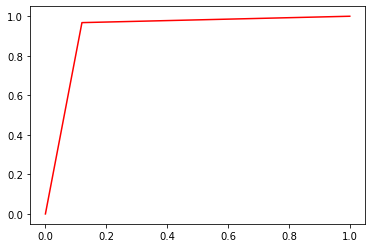

In [14]:
plt.plot(fpr,tpr,'r-')
plt.show()

In [16]:
roc_auc_score(y_test,y_pred)

0.9238709677419356

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        50
           1       0.94      0.97      0.95        93

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



##### Exemplo com SVM

In [21]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [25]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)
svm = SVC(kernel='linear',C=2.0)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [26]:
svm.score(X_test,y_test)

0.9440559440559441

In [27]:
confusion_matrix(y_test,y_pred)

array([[52,  5],
       [ 3, 83]])

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        57
           1       0.94      0.97      0.95        86

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [30]:
roc_curve(y_test,y_pred)

(array([0.       , 0.0877193, 1.       ]),
 array([0.        , 0.96511628, 1.        ]),
 array([2, 1, 0]))

In [31]:
roc_auc_score(y_test,y_pred)

0.9386984904120766

### Metricas de Regressão

##### Erro = |real - pred|
##### Sensível à escala

##### Para um modelo 1
##### valor real = 10000
##### valor predito = 10500
##### Erro = 500

##### Para um modelo 2
##### valor real = 1.0
##### valor predito = 0.9
##### Erro = 0.1

In [37]:
1 - (10000/10500)

0.04761904761904767

In [40]:
1 - (0.9/1)

0.09999999999999998

#### Metricas modelos de regressão

In [41]:
from sklearn.dummy import DummyRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [42]:
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
dt = DecisionTreeRegressor(max_depth=5)

In [47]:
dt.fit(X_train,y_train)
print(dt.score(X_test,y_test))
y_pred = dt.predict(X_test)

0.8763987309111113


In [48]:
r2_score(y_test,y_pred)

0.8763987309111113

In [49]:
print("Media do erro absoluto:", mean_absolute_error(y_test,y_pred))
print("Media do erro quadratico:", mean_squared_error(y_test,y_pred))

Media do erro absoluto: 2.660944617330381
Media do erro quadratico: 12.24375304564678


In [50]:
dr = DummyRegressor(strategy='mean')
dr.fit(X_train,y_train)
y_pred = dr.predict(X_test)

In [51]:
print("R2:", r2_score(y_test,y_pred))
print("Media do erro absoluto:", mean_absolute_error(y_test,y_pred))
print("Media do erro quadratico:", mean_squared_error(y_test,y_pred))

R2: -0.005676907086416438
Media do erro absoluto: 7.004819977977688
Media do erro quadratico: 99.62081930745215


### Seleção de Modelos - Grid Search
* Escolha de um conjunto de dados de classificação
* Utilizar o SVM com kernel RBF
* Fazer 10 divisões de treino e teste
* Para cada divisão do conjunto de treino e teste utilizar a validação cruzada e o Grid-Search pra encontrar o melhor conjunto de parâmetros
* Teste o modelo encontrado nos dados de teste
* Apresentar todas as métricas a cada iteração

In [80]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

In [81]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)
knn = KNeighborsClassifier()

In [82]:
clf = GridSearchCV(knn,{'n_neighbors':[1,2,3,4,5],'p':[2,3]},cv=5)

In [83]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5], 'p': [2, 3]})

In [84]:
clf.best_estimator_.score(X_test,y_test)

0.951048951048951

In [85]:
clf.best_params_

{'n_neighbors': 5, 'p': 3}

In [86]:
clf.cv_results_['params']

[{'n_neighbors': 1, 'p': 2},
 {'n_neighbors': 1, 'p': 3},
 {'n_neighbors': 2, 'p': 2},
 {'n_neighbors': 2, 'p': 3},
 {'n_neighbors': 3, 'p': 2},
 {'n_neighbors': 3, 'p': 3},
 {'n_neighbors': 4, 'p': 2},
 {'n_neighbors': 4, 'p': 3},
 {'n_neighbors': 5, 'p': 2},
 {'n_neighbors': 5, 'p': 3}]

In [87]:
clf.cv_results_['mean_test_score']

array([0.90369357, 0.90834473, 0.90128591, 0.89658003, 0.90369357,
       0.90369357, 0.90366621, 0.89896033, 0.90607387, 0.91313269])

##### Exemplo com SVM

In [88]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
X,y = load_breast_cancer(return_X_y=True)
svm = SVC()
params = {'kernel':['rbf'],'gamma':['auto','scale'],'C':[0.5,1,2,5,10]}

In [98]:
for i in range(0,10):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    clf = GridSearchCV(svm,param_grid=params,cv=5)
    clf.fit(X_train,y_train)
    print(clf.best_params_)
    y_pred = clf.best_estimator_.predict(X_test)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('-------------------------------')

{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.98      0.78      0.87        60
           1       0.86      0.99      0.92        83

    accuracy                           0.90       143
   macro avg       0.92      0.89      0.90       143
weighted avg       0.91      0.90      0.90       143

[[47 13]
 [ 1 82]]
-------------------------------
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        53
           1       0.90      0.96      0.92        90

    accuracy                           0.90       143
   macro avg       0.91      0.88      0.89       143
weighted avg       0.90      0.90      0.90       143

[[43 10]
 [ 4 86]]
-------------------------------
{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.98      0.85      0.91        75
  

In [99]:
svm = SVC(kernel='rbf',C=10,gamma='scale')
svm.fit(X,y)

SVC(C=10)

In [ ]:
svm.predict()